In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from keras import layers
from tensorflow.keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

data normalize

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Change the data dimension for VGG16

In [5]:
x_train = np.stack([x_train]*3, axis=-1)
x_test = np.stack([x_test]*3, axis=-1)

Convert labels to categorical format

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
resized_x_train = tf.image.resize(x_train, (32,32))
resized_x_test = tf.image.resize(x_test, (32,32))

resized_x_train.shape, x_train.shape

(TensorShape([60000, 32, 32, 3]), (60000, 28, 28, 3))

 Build VGG16 model

In [8]:
def model_VGG16(learning_rate, epochs, batch_size):
    base_model = VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=(32, 32, 3),
        pooling='avg'
    )

    # Adding custom layers
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.25)(x)
    predictions = layers.Dense(10, activation='softmax')(x)

    # Creating the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compilation
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Model training
    history = model.fit(
        resized_x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2
    )

    test_loss, test_accuracy = model.evaluate(resized_x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return model, history
     

# Hyperparametrs
learning_rate = 0.001
epochs = 15
batch_size = 200
     


     

# Train model
model, history_v2 = model_VGG16(learning_rate, epochs, batch_size)
     


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 416s 2s/step - accuracy: 0.2926 - loss: 1.7947 - val_accuracy: 0.8428 - val_loss: 0.4791
Epoch 2/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.8520 - loss: 0.4298 - val_accuracy: 0.8940 - val_loss: 0.3058
Epoch 3/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.8990 - loss: 0.2889 - val_accuracy: 0.9081 - val_loss: 0.2632
Epoch 4/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - accuracy: 0.9152 - loss: 0.2456 - val_accuracy: 0.9106 - val_loss: 0.2665
Epoch 5/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 401s 2s/step - accuracy: 0.9273 - loss: 0.2103 - val_accuracy: 0.9189 - val_loss: 0.2538
Epoch 6/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.9321 - loss: 0.2007 - val_accuracy: 0.9178 - val_loss: 0.2384
Epoch 7/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.9417 - loss: 0.1707 - val_accuracy: 0.9147 - val_loss: 0.2531
Epoch 8/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 418s 2

Display the model summary table to see all layers and their parameters

In [9]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 44,545,760 (169.93 MB)

 Trainable params: 14,848,586 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,697,174 (113.29 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step


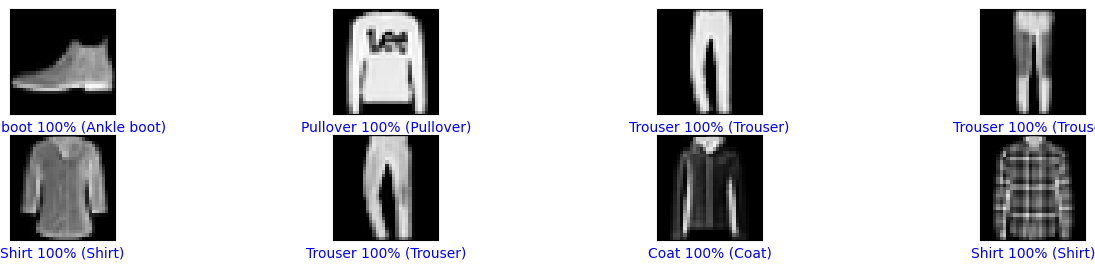

In [10]:
predictions = model.predict(resized_x_test)

def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
num_images = 8
num_rows = 2
num_cols = 4
plt.figure(figsize=(2*num_images, 3))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions[i], y_test[i], resized_x_test[i])



Висновки

VGG16 модель показала не погані результати 92.04% accuracy, трішки гірше за модель з першої частини яка показала результати 92.07%.
